In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [3]:
dfc = pd.read_csv('data/candidate_result.csv')
dfc.head()

,seat,year,party,name,votes,votes_pc,winner
0,Dhaka-3,2008,BNP,Gayeshwar Chandra Roy,70680.0,36.71,no
1,Dhaka-6,1991,Independent,Sayed Sharafat Hossain,8.0,0.01,no
2,Dhaka-6,1991,Jatiya Janata Party (Asad),Md. Afzalul Huq Afzal,9.0,0.01,no
3,Comilla-3,2001,Independent,Md. Ainul Haque,12.0,0.01,no
4,Dhaka-5,1991,Jatiyatabadi Gonotantrik Chashi Dal,Afzaluddin Chowdhury,14.0,0.01,no


In [4]:
dfc.shape

(8747, 7)

In [5]:
# only take 4 elections data
dfc = dfc[dfc.year.isin(years)]
dfc.shape

(8183, 7)

In [6]:
# find total wins across 4 elections by AL and BNP
dfcwin_party = dfc[dfc.winner == 'yes'].groupby(['seat', 'party']).size().unstack(fill_value=0)[mainp]
dfcwin_party.head()

party,AL,BNP
seat,,
Bagerhat-1,4,0
Bagerhat-2,2,2
Bagerhat-3,4,0
Bagerhat-4,2,0
Bandarban,2,0


In [7]:
# find win difference between AL and BNP
# this is to plot the data as a heatmap
dfcwin_party['win AL'] = dfcwin_party['AL'] - dfcwin_party['BNP']
dfcwin_party.head()

party,AL,BNP,win AL
seat,,,
Bagerhat-1,4,0,4
Bagerhat-2,2,2,0
Bagerhat-3,4,0,4
Bagerhat-4,2,0,2
Bandarban,2,0,2


In [8]:
dfcwin_party.to_csv('dataout/mainp_win_diff.csv')

In [9]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [10]:
# join data with map data
map_windiff = bdmap.merge(dfcwin_party, how='left', left_on='seat', right_index=True)
map_windiff.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry,AL,BNP,win AL
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494...",1,3,-2
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971...",1,2,-1
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788...",3,1,2
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,...",3,0,3
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391...",2,0,2


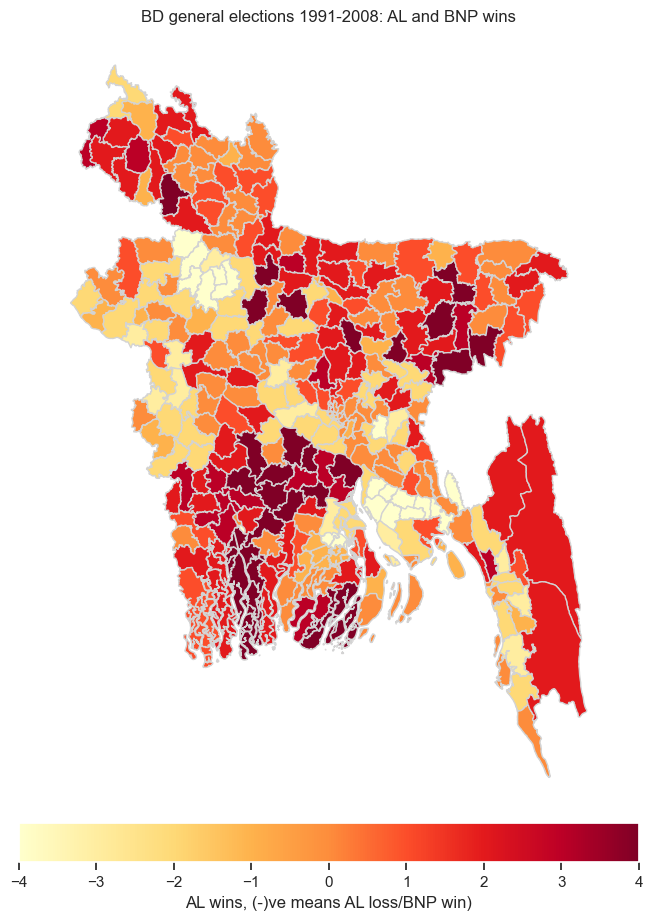

In [11]:
# plot map
fig, ax = plt.subplots(figsize=(8, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

map_windiff.plot(
    column='win AL', 
    cmap='YlOrRd', 
    edgecolor='lightgrey',
    legend=True, 
    ax=ax,
    cax=cax,
    legend_kwds={
        'label': 'AL wins, (-)ve means AL loss/BNP win)',
        'orientation': 'horizontal'
    }
)
ax.set_axis_off()
ax.title.set_text("BD general elections 1991-2008: AL and BNP wins")
fig.savefig('fig/mainp_win_diff',bbox_inches='tight')

In [13]:
# save interactive map
fol = map_windiff.explore(
    column="win AL", 
    tooltip=False, 
    popup=True, 
    cmap='plasma', 
    style_kwds=dict(color="lightgrey"), 
)

fol.save('mapout/mainp_win_diff.html')